# SVR (Support Vector Regression)

## Importing the libraries

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [81]:
dataset = pd.read_csv('/home/c/Machine-Learning/datasets/Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [82]:
print(X) # Is 2D array
print(y) # Isn't a 2D array

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [83]:
# Turning the variables in a 2D array
y = y.reshape(len(y), 1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

## Feature Scalling

In [84]:
from sklearn.preprocessing import StandardScaler

# The scalling is applied separatedly 'cause each variables has different ranges of values
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [85]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [86]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

## Training the SVR model on the whole dataset

In [87]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf') # kernel is the ML math-function; gaussian rbf is the most used
regressor.fit(X, y.ravel()) 
                 # change a 2-dimensional array or a multi-dimensional array into a contiguous flattened array (stored in a 1D array)

SVR()

## Predicting a new result

In [88]:
                                        # scalling the value, then predict
y_pred_scaled = regressor.predict(sc_X.transform([[6.5]]))
y_pred_real = sc_y.inverse_transform([y_pred_scaled]) # the '[]' turn the 1D ouput in 2D to be inverted
y_pred_real
# inverting the scalling to get the real output

array([[170370.0204065]])

## Visualising the SVR results

In [96]:
# Giving the same dimensions to the plot line variables 
X = X.reshape(10, 1) 
y_plot = sc_y.inverse_transform([regressor.predict(X)])
y_plot = y_plot.reshape(10, 1)

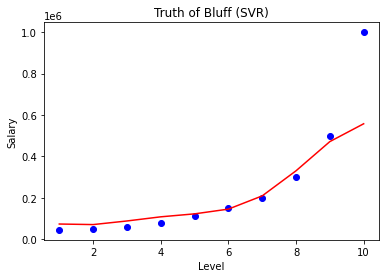

In [99]:
# Plotting the graph
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'blue')
plt.plot(sc_X.inverse_transform(X), y_plot, color = 'red')
plt.title('Truth of Bluff (SVR)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()